# Foundations of Statistical Analysis and Machine Learning - Final exam exercise 1

### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have the maximum grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The subject is long but don't worry if you cannot complete 100 % of the questions, try to do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied from previous another notebook will be penalized. Moreover, similarities between student works are easy to spot.

Good luck!

## Exercise 1 (8 points)

Here are some libraries that could be usefull in the exercises.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

We will work here on the Boston housing data set that records the median value of houses for 506 neighborhoods around Boston. Our task is to predict the median house value.

Let's import that data set from Scikit-learn:  
**Don't worry about the warning for now, see the bonus question a the end.**

In [31]:
from sklearn.datasets import load_boston
data_bunch = load_boston()

/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [32]:
data_bunch.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In this data bunch, we have data for the features and feature_names for their names, and target for the response. All the data are already cleaned.

Let's check the description of this data set:

In [33]:
print(data_bunch.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Here are the names of the available features (their discription is given above):

In [34]:
data_bunch.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Let's prepare the data frame of the target (corresponding to the median value of the houses in a specific neighborhood of Boston):

In [35]:
y = pd.DataFrame(data=data_bunch.target, columns=['HOUSEVALUE'])

In [36]:
y.head()

,HOUSEVALUE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Let's prepare the data frame of the features:

In [37]:
X = pd.DataFrame(data=data_bunch.data, columns=data_bunch.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 1) We will focus here on LSTAT. Compute the correlation of LSTAT with the other features. Which other feature is the most correlated with LSTAT? Which is the least?

<AxesSubplot:>

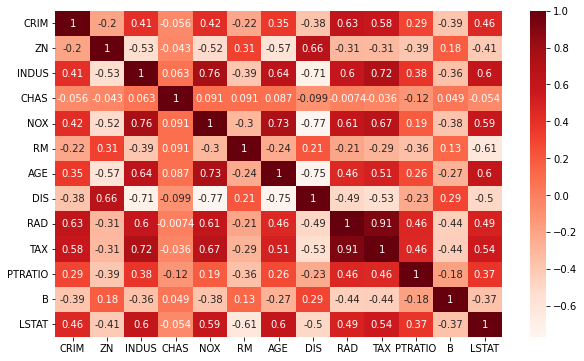

In [39]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='Reds')

INDUS and AGE are the most correlated columns with LSTAT as it can be seen in the bottom line of the plot above. And, the other columns comes so on.

### 2a) Plot HOUSEVALUE (our target) vs. LSTAT (our predictor)

<AxesSubplot:xlabel='LSTAT', ylabel='HOUSEVALUE'>

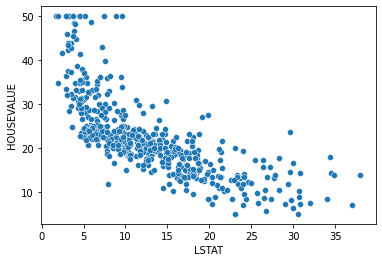

In [40]:
sns.scatterplot(x=X['LSTAT'], y=y['HOUSEVALUE'])

There is negative linear correlation between two columns.

### 2b) Do you think that a linear regression is relevant for predicting HOUSEVALUE from LSTAT? Explain why.

It is a yes, because even corr is negative, it still goes linearly.

### 3) Proceed to a split of the dataset. Bear in mind that you will have to give an accurate estimation of the performance of your best model at the end. Keep 60% of the examples for the training set. 

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
print ('Train set:\t', X_train.shape,  y_train.shape)
print ('Test set:\t', X_test.shape,  y_test.shape)

Train set:	 (303, 13) (303, 1)
Test set:	 (203, 13) (203, 1)


### 4a) Train a linear regression model with LSTAT as predictor. 

In [42]:
from sklearn.model_selection import train_test_split


X_L = X['LSTAT'].values.reshape(-1, 1)

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y, test_size=0.40, random_state=0)
print ('Train set:\t', X_train_L.shape,  y_train_L.shape)
print ('Test set:\t', X_test_L.shape,  y_test_L.shape)

Train set:	 (303, 1) (303, 1)
Test set:	 (203, 1) (203, 1)


In [43]:
from sklearn.linear_model import LinearRegression


linr = LinearRegression()
linr.fit(X_train_L, y_train_L)

LinearRegression()

### 4b) Compute the performance metrics of the model (at least R-squared and another metric of your choice).   How do you interpret that? Does the model have a reasonable error in this context?

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def measure_perf(y_true, y_pred):
    print("Mean square error (MSE): %.2f" % mean_squared_error(y_true, y_pred))
    print("Root mean square error (RMSE): %.2f" % mean_squared_error(y_true, y_pred, squared=False))
    print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_true, y_pred))
    print("R^2 score is: %.2f" % r2_score(y_true, y_pred))

In [45]:
y_pred_L = linr.predict(X_test_L)
measure_perf(y_test_L, y_pred_L)

Mean square error (MSE): 39.74
Root mean square error (RMSE): 6.30
Mean absolute error (MAE): 4.58
R^2 score is: 0.52


Comparing to the prior predicts we've done before, the error amount in all MSE, RMSE, and MAE is considerably acceptable.

### 4c) What is the coefficient associated with LSTAT? What is the value of the other parameter of your model? Can you interpret your model's parameters and explain how it generates predictions for HOUSEVALUE?

In [46]:
print(f'coef of LSTAT is: {linr.coef_[0][0]}')
print(f'Intercept of LSTAT is: {linr.intercept_[0]}')

coef of LSTAT is: -0.9710240546495684
Intercept of LSTAT is: 34.88337392662986


### fill here

### 4d) Add the regression line on your plot HOUSEVALUE vs. LSTAT

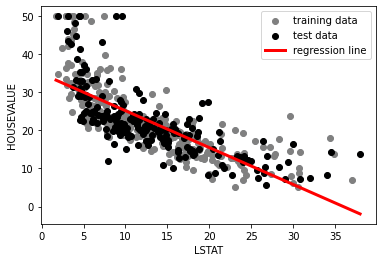

In [47]:
X_line = np.arange(min(X_L), max(X_L), 0.1)
y_line = linr.predict(X_line.reshape(-1, 1))

sns.scatterplot(x=X['LSTAT'], y=y['HOUSEVALUE'])
plt.scatter(X_train_L, y_train_L, c='gray', label='training data')
plt.scatter(X_test_L, y_test_L, c='black', label='test data')
plt.plot(X_line, y_line, label='regression line', c='red', linewidth=3)
plt.legend()

### 5a) Use any feature engineering technique you know in order to train a better linear regression model that uses LSTAT (only) to predict HOUSEVALUE  
Hint: Look at the regression line you plotted in the last question and see what you could improve.

In [48]:
X_m = X[['LSTAT', 'NOX', 'AGE', 'TAX', 'RM', 'CHAS']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y, test_size=0.40, random_state=0)
print ('Train set:\t', X_train_m.shape,  y_train_m.shape)
print ('Test set:\t', X_test_m.shape,  y_test_m.shape)

Train set:	 (303, 6) (303, 1)
Test set:	 (203, 6) (203, 1)


In [49]:
linr_m = LinearRegression()
linr_m.fit(X_train_m, y_train_m)

LinearRegression()

In [50]:
y_pred_m = linr_m.predict(X_test_m)
measure_perf(y_test_m, y_pred_m)

Mean square error (MSE): 29.49
Root mean square error (RMSE): 5.43
Mean absolute error (MAE): 3.90
R^2 score is: 0.64


Both error amounts and R2 is observably improved with multiple predictors

### 5b) Show the regression line of your new model on the plot HOUSEVALUE vs. LSAT

In [51]:
X_line = np.arange(min(X_m.values), max(X_m.values), 0.1)
y_line = linr.predict(X_line.reshape(-1, 1))

sns.scatterplot(x=X['LSTAT'], y=y['HOUSEVALUE'])
plt.scatter(X_train_L, y_train_L, c='gray', label='training data')
plt.scatter(X_test_L, y_test_L, c='black', label='test data')
plt.plot(X_line, y_line, label='regression line', c='red', linewidth=3)
plt.legend()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### 5c) Compute the same two performance metrics as in question 4b on your improved model. Is it doing better?

In [ ]:
measure_perf(y_test_m, y_pred_m)

Mean square error (MSE): 29.49
Root mean square error (RMSE): 5.43
Mean absolute error (MAE): 3.90
R^2 score is: 0.64


### 6a) Train a last regression model that uses ALL available features as predictors

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.40, random_state=0)
print ('Train set:\t', X_train_f.shape,  y_train_f.shape)
print ('Test set:\t', X_test_f.shape,  y_test_f.shape)

Train set:	 (303, 13) (303, 1)
Test set:	 (203, 13) (203, 1)


In [ ]:
l_f = LinearRegression()
l_f.fit(X_train_f, y_train_f)

LinearRegression()

In [ ]:

y_pred_f = l_f.predict(X_test_f)

### 6b) What are the performance metrics when you take all the features as predictors?

In [ ]:
measure_perf(y_test_f, y_pred_f)

### 7) Choose the best model among the three you trained previously and give a reliable assessment (on unseen data) of the following metrics: [R-squared, MAE, RMSE]. Interpret the metrics you obtain

### 8) BONUS: While loading the dataset, you might have seen a warning saying that the dataset is deprecated because of an ethical problem. What do you think is problematic? 